## RandAugmentation_trash
- baseline code가 존재하는 디렉토리에 해당 노트북을 다운받아 실행해주시기바랍니다.

In [7]:
import torch
import os
import sys
import yaml
from torchvision import transforms
# from torchvision.datasets import CIFAR10
from 
from torch.utils.data import DataLoader, random_split
from typing import Tuple
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

if "./" not in sys.path:
    sys.path.append("./")

In [8]:
from src.model import Model
from src.trainer import TorchTrainer
from src.loss import CustomCriterion

In [4]:
MEAN_V = (0.4914, 0.4822, 0.4465)
STD_V = (0.2470, 0.2435, 0.2616)

DATASET_DIR = "../data/train"

In [5]:
def generate_transform(resize: int = 32, aug_fcns: Tuple = ()) -> transforms.transforms.Compose:
    """Generate train augmentation policy."""
    transform_fcns = []
    transform_fcns.append(transforms.Resize((resize, resize)))
    transform_fcns += list(aug_fcns)
    
    transform_fcns.append(transforms.ToTensor())
    transform_fcns.append(transforms.Normalize(MEAN_V, STD_V))
    
    return transforms.Compose(transform_fcns)
    

In [6]:
def load_cifar10(img_size: int = 32, 
                 aug_fcns: Tuple = (), 
                 validation_ratio: float = 0.8,
                ) -> Tuple[CIFAR10, CIFAR10, CIFAR10]:
    tf_train = generate_transform(resize=img_size, aug_fcns=aug_fcns)
    tf_test = generate_transform(resize=img_size)
    
    train_dataset = CIFAR10(root=DATASET_DIR, train=True, download=True, transform=tf_train)
    train_length = int(len(train_dataset) * validation_ratio)
    val_length = len(train_dataset) - train_length

    train_dataset, val_dataset = random_split(train_dataset, [train_length, val_length])
    test_dataset = CIFAR10(root=DATASET_DIR, train=False, download=True, transform=tf_test)
    
    return train_dataset, val_dataset, test_dataset
    

NameError: name 'CIFAR10' is not defined

In [6]:
img_size = 32

augmentation_functions = (
    transforms.ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5), saturation=(0.5, 1.5)), 
    transforms.RandomPerspective(),
    transforms.RandomHorizontalFlip(),
)

train_dataset, val_dataset, test_dataset = load_cifar10(img_size=img_size, aug_fcns = augmentation_functions, validation_ratio=0.8)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
def tensor_to_img(tensor_img: torch.Tensor) -> np.ndarray:
    return ((tensor_img.permute(1, 2, 0).numpy() * STD_V + MEAN_V) * 255).astype(np.uint8)

def visualize_datasets(_train_dataset: CIFAR10, _val_dataset: CIFAR10, _test_dataset: CIFAR10, title_prefix: str = "") -> None:
    fig, ax = plt.subplots(3, 7, figsize=(20, 10))

    for i in range(7):
        idx = np.random.randint(0, len(val_dataset))

        ax[0][i].imshow(tensor_to_img(_train_dataset[idx][0]))
        ax[1][i].imshow(tensor_to_img(_val_dataset[idx][0]))
        ax[2][i].imshow(tensor_to_img(_test_dataset[idx][0]))

        ax[0][i].axis('off')
        ax[1][i].axis('off')
        ax[2][i].axis('off')

    fig.suptitle(f"{title_prefix} Visualization of Augmentation.\n(Each row represents train, validation, test dataset accordingly)")
    fig.show()

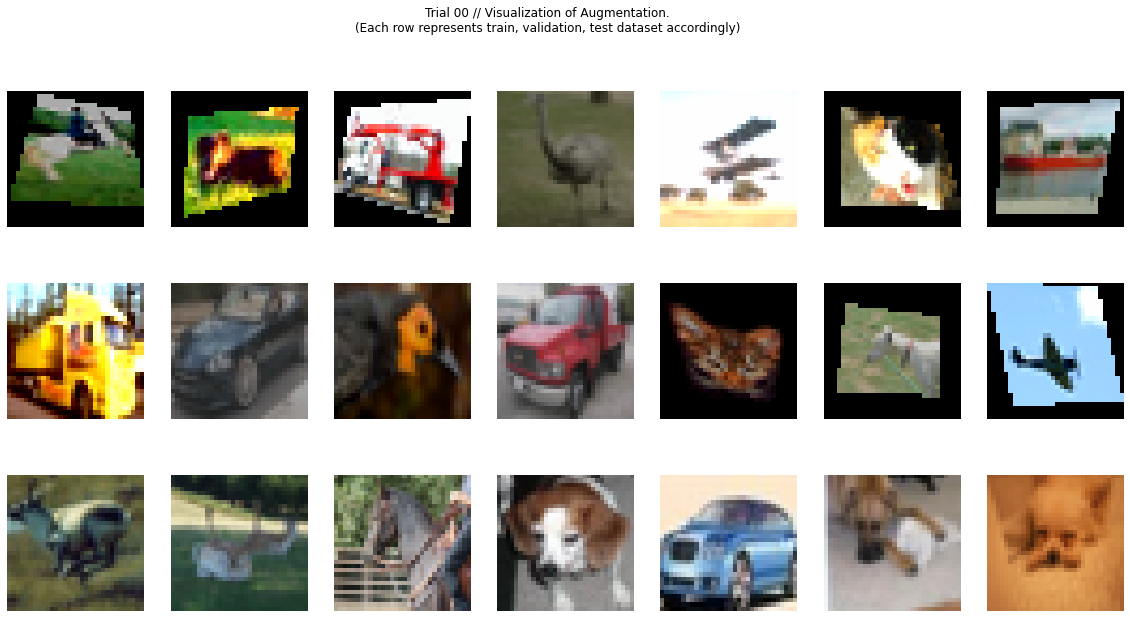

In [8]:
visualize_datasets(train_dataset, val_dataset, test_dataset, title_prefix="Trial 00 //")

In [9]:
import yaml

In [11]:
with open("./configs/model/mobilenetv3.yaml", "r") as f:
# with open("./configs/model/model.yml", "r") as f:
    model_cfg = yaml.load(f, yaml.SafeLoader)

model_cfg['backbone'][-1][-1] = [10]

model = Model(model_cfg, verbose=True)

idx |   n |     params |          module |            arguments |   in_channel |   out_channel
----------------------------------------------------------------------------------------------
  0 |   1 |        464 |            Conv | [16, 3, 2, None, 1, 'HardSwish'] |            3           16
  1 |   1 |        464 | InvertedResidualv3 |  [3, 1, 16, 0, 0, 1] |           16           16
  2 |   1 |      3,440 | InvertedResidualv3 |  [3, 4, 24, 0, 0, 2] |           16           24
  3 |   1 |      4,440 | InvertedResidualv3 |  [3, 3, 24, 0, 0, 1] |           24           24
  4 |   1 |     10,328 | InvertedResidualv3 |  [5, 3, 40, 1, 0, 2] |           24           40
  5 |   1 |     20,992 | InvertedResidualv3 |  [5, 3, 40, 1, 0, 1] |           40           40
  6 |   1 |     20,992 | InvertedResidualv3 |  [5, 3, 40, 1, 0, 1] |           40           40
  7 |   1 |     32,080 | InvertedResidualv3 |  [3, 6, 80, 0, 1, 2] |           40           80
  8 |   1 |     34,760 | InvertedResidual

In [15]:
# with open("./configs/model/mobilenetv3.yaml", "r") as f:
with open("./configs/model/model.yml", "r") as f:
    model_cfg = yaml.load(f, yaml.SafeLoader)

# model_cfg['backbone'][-1][0] = [10]



In [16]:
model = Model(model_cfg, verbose=True)

idx |   n |     params |          module |            arguments |   in_channel |   out_channel
----------------------------------------------------------------------------------------------
  0 |   1 |        464 |          DWConv | [16, 3, 1, None, 'ReLU'] |            3           16
  1 |   2 |     19,064 | InvertedResidualv3 | [5, 4.4, 32, 0, 0, 2] |           16           32
  2 |   2 |     88,704 | InvertedResidualv3 | [5, 2.9, 80, 1, 0, 2] |           32           80
  3 |   1 |        480 |          DWConv | [160, 1, 2, None, 'ReLU'] |           80          160
  4 |   1 |     41,472 |            Conv | [256, 1, 1, None, 1, 'Hardswish'] |          160          256
  5 |   1 |    198,144 |            Conv |          [768, 1, 1] |          256          768
  6 |   1 |          0 |   GlobalAvgPool |                   [] |          768          768
  7 |   1 |      7,700 |       FixedConv | [10, 1, 1, None, 1, None] |          768           10
Model Summary: 76 layers, 356,028 param

In [17]:
torch.cuda.is_available()

True

In [32]:
EPOCHS = 10
BATCH_SIZE = 256

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

optimizer = torch.optim.SGD(model.model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer=optimizer, max_lr=0.1, steps_per_epoch=len(train_dataset), epochs=EPOCHS, pct_start=0.05)
criterion = CustomCriterion(samples_per_cls=None, device=device)

train_loader = DataLoader(dataset=train_dataset, 
                          pin_memory=torch.cuda.is_available(), 
                          shuffle=True, 
                          batch_size=BATCH_SIZE, 
                          num_workers=4, 
                          drop_last=True)
val_loader = DataLoader(dataset=val_dataset, 
                        pin_memory=torch.cuda.is_available(), 
                        shuffle=False, 
                        batch_size=BATCH_SIZE, 
                        num_workers=4)
test_loader = DataLoader(dataset=test_dataset, 
                         pin_memory=torch.cuda.is_available(), 
                         shuffle=False, 
                         batch_size=BATCH_SIZE, 
                         num_workers=4)
    
exp_dir = "./exp/autoaug"
os.makedirs(exp_dir, exist_ok=True)
trainer = TorchTrainer(model=model, 
                       criterion=criterion, 
                       optimizer=optimizer, 
                       scheduler=scheduler, 
                       device=device, 
                       verbose=1, 
                       model_path=os.path.join(exp_dir, "best.pt"))

best_acc, best_f1 = trainer.train(train_dataloader=train_loader, 
                                  n_epoch=EPOCHS, 
                                  val_dataloader=val_loader)

Train: [001] Loss: 2.163, Acc: 18.58% F1(macro): 0.18: 100%|██████████| 156/156 [00:10<00:00, 14.97it/s]
 Val:       Loss: 2.038, Acc: 26.17% F1(macro): 0.22: 100%|██████████| 40/40 [00:02<00:00, 16.84it/s]


Model saved. Current best test f1: 0.220


Train: [002] Loss: 1.864, Acc: 30.51% F1(macro): 0.30: 100%|██████████| 156/156 [00:10<00:00, 14.95it/s]
 Val:       Loss: 1.825, Acc: 33.41% F1(macro): 0.32: 100%|██████████| 40/40 [00:02<00:00, 17.51it/s]


Model saved. Current best test f1: 0.324


Train: [003] Loss: 1.743, Acc: 35.25% F1(macro): 0.35: 100%|██████████| 156/156 [00:10<00:00, 14.77it/s]
 Val:       Loss: 1.709, Acc: 36.99% F1(macro): 0.36: 100%|██████████| 40/40 [00:02<00:00, 17.27it/s]


Model saved. Current best test f1: 0.359


Train: [004] Loss: 1.649, Acc: 39.45% F1(macro): 0.39: 100%|██████████| 156/156 [00:10<00:00, 14.85it/s]
 Val:       Loss: 1.657, Acc: 39.32% F1(macro): 0.39: 100%|██████████| 40/40 [00:02<00:00, 17.30it/s]


Model saved. Current best test f1: 0.387


Train: [005] Loss: 1.605, Acc: 41.60% F1(macro): 0.41: 100%|██████████| 156/156 [00:10<00:00, 15.12it/s]
 Val:       Loss: 1.597, Acc: 40.86% F1(macro): 0.41: 100%|██████████| 40/40 [00:02<00:00, 14.82it/s]


Model saved. Current best test f1: 0.407


Train: [006] Loss: 1.546, Acc: 43.79% F1(macro): 0.43: 100%|██████████| 156/156 [00:10<00:00, 14.93it/s]
 Val:       Loss: 1.533, Acc: 43.08% F1(macro): 0.42: 100%|██████████| 40/40 [00:02<00:00, 17.05it/s]


Model saved. Current best test f1: 0.420


Train: [007] Loss: 1.515, Acc: 44.88% F1(macro): 0.45: 100%|██████████| 156/156 [00:10<00:00, 14.81it/s]
 Val:       Loss: 1.516, Acc: 44.39% F1(macro): 0.44: 100%|██████████| 40/40 [00:02<00:00, 17.27it/s]


Model saved. Current best test f1: 0.440


Train: [008] Loss: 1.461, Acc: 47.01% F1(macro): 0.47: 100%|██████████| 156/156 [00:10<00:00, 14.84it/s]
 Val:       Loss: 1.489, Acc: 45.93% F1(macro): 0.46: 100%|██████████| 40/40 [00:02<00:00, 17.29it/s]


Model saved. Current best test f1: 0.456


Train: [009] Loss: 1.438, Acc: 48.12% F1(macro): 0.48: 100%|██████████| 156/156 [00:10<00:00, 14.88it/s]
 Val:       Loss: 1.467, Acc: 46.47% F1(macro): 0.45: 100%|██████████| 40/40 [00:02<00:00, 17.63it/s]
Train: [010] Loss: 1.406, Acc: 49.24% F1(macro): 0.49: 100%|██████████| 156/156 [00:10<00:00, 15.19it/s]
 Val:       Loss: 1.439, Acc: 47.89% F1(macro): 0.48: 100%|██████████| 40/40 [00:02<00:00, 17.54it/s]


Model saved. Current best test f1: 0.482


In [58]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [18]:
EPOCHS = 5
BATCH_SIZE = 256

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

optimizer = torch.optim.SGD(model.model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer=optimizer, max_lr=0.1, steps_per_epoch=len(train_dataset), epochs=EPOCHS, pct_start=0.05)
criterion = CustomCriterion(samples_per_cls=None, device=device)

train_loader = DataLoader(dataset=train_dataset, 
                          pin_memory=torch.cuda.is_available(), 
                          shuffle=True, 
                          batch_size=BATCH_SIZE, 
                          num_workers=4, 
                          drop_last=True)
val_loader = DataLoader(dataset=val_dataset, 
                        pin_memory=torch.cuda.is_available(), 
                        shuffle=False, 
                        batch_size=BATCH_SIZE, 
                        num_workers=4)
test_loader = DataLoader(dataset=test_dataset, 
                         pin_memory=torch.cuda.is_available(), 
                         shuffle=False, 
                         batch_size=BATCH_SIZE, 
                         num_workers=4)
    
exp_dir = "./exp/autoaug_yml"
os.makedirs(exp_dir, exist_ok=True)
trainer = TorchTrainer(model=model, 
                       criterion=criterion, 
                       optimizer=optimizer, 
                       scheduler=scheduler, 
                       device=device, 
                       verbose=1, 
                       model_path=os.path.join(exp_dir, "best.pt"))

best_acc, best_f1 = trainer.train(train_dataloader=train_loader, 
                                  n_epoch=EPOCHS, 
                                  val_dataloader=val_loader)

Train: [001] Loss: 2.032, Acc: 23.43% F1(macro): 0.22: 100%|██████████| 156/156 [00:09<00:00, 16.88it/s]
 Val:       Loss: 1.872, Acc: 29.46% F1(macro): 0.29: 100%|██████████| 40/40 [00:02<00:00, 17.36it/s]


Model saved. Current best test f1: 0.286


Train: [002] Loss: 1.735, Acc: 35.96% F1(macro): 0.35: 100%|██████████| 156/156 [00:09<00:00, 16.27it/s]
 Val:       Loss: 1.707, Acc: 37.41% F1(macro): 0.37: 100%|██████████| 40/40 [00:02<00:00, 16.93it/s]


Model saved. Current best test f1: 0.371


Train: [003] Loss: 1.566, Acc: 43.31% F1(macro): 0.42: 100%|██████████| 156/156 [00:10<00:00, 15.45it/s]
 Val:       Loss: 1.558, Acc: 44.07% F1(macro): 0.44: 100%|██████████| 40/40 [00:02<00:00, 17.31it/s]


Model saved. Current best test f1: 0.436


Train: [004] Loss: 1.437, Acc: 48.42% F1(macro): 0.48: 100%|██████████| 156/156 [00:09<00:00, 16.57it/s]
 Val:       Loss: 1.447, Acc: 48.44% F1(macro): 0.48: 100%|██████████| 40/40 [00:02<00:00, 16.88it/s]


Model saved. Current best test f1: 0.481


Train: [005] Loss: 1.318, Acc: 52.77% F1(macro): 0.52: 100%|██████████| 156/156 [00:09<00:00, 16.52it/s]
 Val:       Loss: 1.377, Acc: 51.35% F1(macro): 0.51: 100%|██████████| 40/40 [00:02<00:00, 17.19it/s]


Model saved. Current best test f1: 0.513


In [33]:
test_loss, test_f1, test_accuracy = trainer.test(model, test_loader)

 Val:       Loss: 1.246, Acc: 55.45% F1(macro): 0.55: 100%|██████████| 40/40 [00:01<00:00, 39.43it/s]


In [1]:
test_loss, test_f1, test_accuracy = trainer.test(model, test_loader)

NameError: name 'trainer' is not defined